# **Business Understanding**
**Topik :** Airline Customer Value Analysis Case
## **`Problem`**
Membantu maskapai penerbangan dalam memahami karakteristik customer dan mengembangkan strategi pemasaran yang tepat serta meningkatkan pendapatan.
## **`Goals`**
Mengelompokkan customer ke dalam segmen-segmen yang berbeda berdasarkan karakteristik, perilaku, dan preferensi mereka berdasarkan data yang ada, sehingga berdasarkan hasil analisa dapat ditarik kesimpulan yang dapat membantu dalam mengembangkan strategi pemesaran dan meningkatkan pendapatan.
## **`Objective`**
Membangun model machine learning yang dapat membantu maskapai penerbangan dalam memahami karakteristik customer.
## **`Business Metrics`**
- Marketing Campaign
- Revenue

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import datetime

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FitAndraini/portfolio-data-science/main/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Explore data 

1. **MEMBER_NO-b** : ID Member
2. **FFP_DATE** : Frequent Flyer Program Join Date
3. **FIRST_FLIGHT_DATE** : Tanggal Penerbangan pertama
4. **GENDER** : Jenis Kelamin
5. **FFP_TIER** : Tier dari Frequent Flyer Program
6. **WORK_CITY** : Kota Asal
7. **WORK_PROVINCE** : Provinsi Asal
8. **WORK_COUNTRY** : Negara Asal
9. **AGE** : Umur Customer
10. **LOAD_TIME** : Tanggal data diambil
11. **FLIGHT_COUNT** : Jumlah penerbangan Customer
12. **BP_SUM** : Rencana Perjalanan
13. **SUM_YR_1** : Fare Revenue
14. **SUM_YR_2** : Votes Prices
15. **SEG_KM_SUM** : Total jarak(km) penerbangan yg sudah dilakukan
16. **LAST_FLIGHT_DATE** : Tanggal penerbangan terakhir
17. **LAST_TO_END** : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
18. **AVG_INTERVAL** : Rata-rata jarak waktu
19. **MAX_INTERVAL** : Maksimal jarak waktu
20. **EXCHANGE_COUNT** : Jumlah penukaran
21. **Avg_Discount** : Rata rata discount yang didapat customer
22. **Points_Sum** : Jumlah poin yang didapat customer
23. **Point_NotFlight** : point yang tidak digunakan oleh members

# **Exploratory Data Analysis**

# **Descriptive Statistics**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# Melihat jumlah data
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom MEMBER_NO:
54993    1
44438    1
45331    1
55783    1
49635    1
        ..
62417    1
33259    1
32017    1
50950    1
61340    1
Name: MEMBER_NO, Length: 62988, dtype: int64

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom FFP_TIER:
4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen

Kita dapat melihat bahwa:
- Dataframe memiliki total 62988 baris dan 22 kolom
- Beberapa kolom memiliki type data yang tidak sesuai seperti
`FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`,  `LAST_FLIGHT_DATE`.
- Terdapat data missing value seperti `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, `SUM_YR_2`, `LAST_FLIGHT_DATE`.
- Tidak terdapat duplicated data

In [ ]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
37762,678,5/24/2006,6/23/2006,Female,4,guangzhou,guangdong,CN,37.0,3/31/2014,...,330.0,8280,6/24/2013,282,63.142857,300,0,0.625415,2764,0
1523,48174,4/23/2008,12/18/2008,Female,6,fuzhou,fujian,CN,27.0,3/31/2014,...,42692.0,45867,3/24/2014,8,25.153846,145,0,1.290050,61408,2
55874,1361,1/31/2010,1/31/2013,Male,4,shenzhenshi,guangdongsheng,CN,35.0,3/31/2014,...,1037.0,2664,7/31/2013,245,60.333333,124,0,0.705000,2386,2
52942,52102,1/1/2013,1/31/2013,Female,4,guangzhoushi,guangdong,CN,30.0,3/31/2014,...,0.0,5791,2/12/2013,414,12.000000,12,0,0.400000,2025,0
48876,50452,7/28/2012,7/28/2012,Male,4,Seo-gu,Busan,KR,63.0,3/31/2014,...,0.0,3058,8/3/2012,607,3.000000,3,0,0.960334,2608,0


# **Statistical Summary**

In [ ]:
nums = ['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
cats = ['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY',]
times = ['FFP_DATE','FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0
MAX_INTERVAL,62988.0,166.033895,123.397180,0.0,79.000000,143.000000,228.000000,728.0


In [ ]:
df[cats].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748


In [ ]:
df[times].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


# **Univariate Analysis**

### Boxplot 

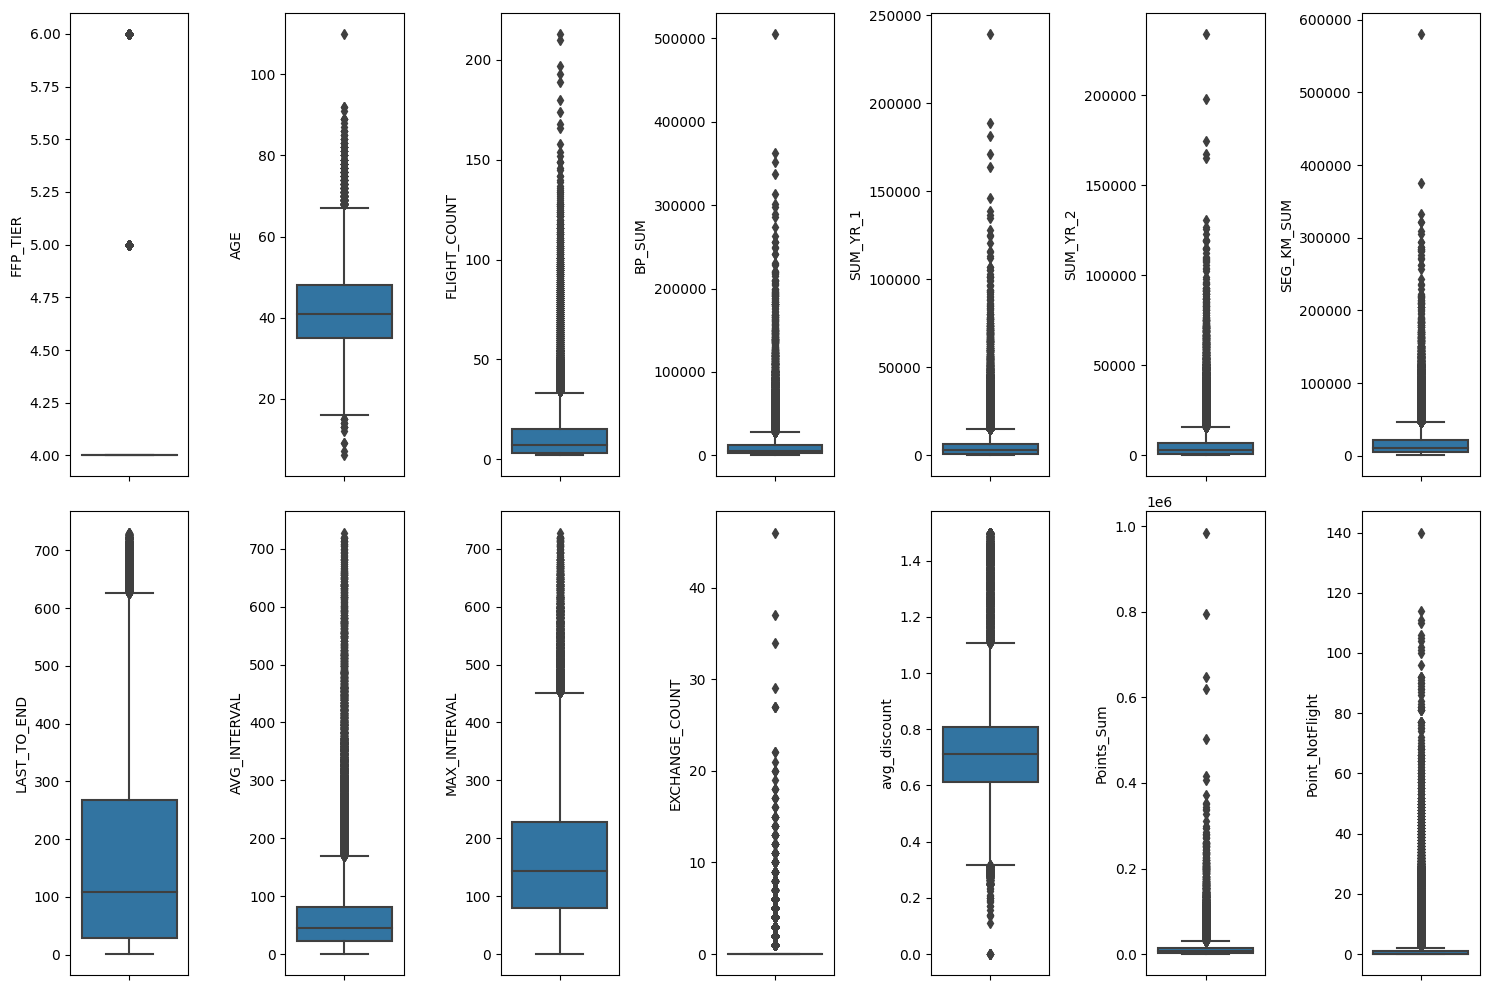

In [ ]:
plt.figure(figsize=(15,10))
for i in range(0, len(nums)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

### Histplot

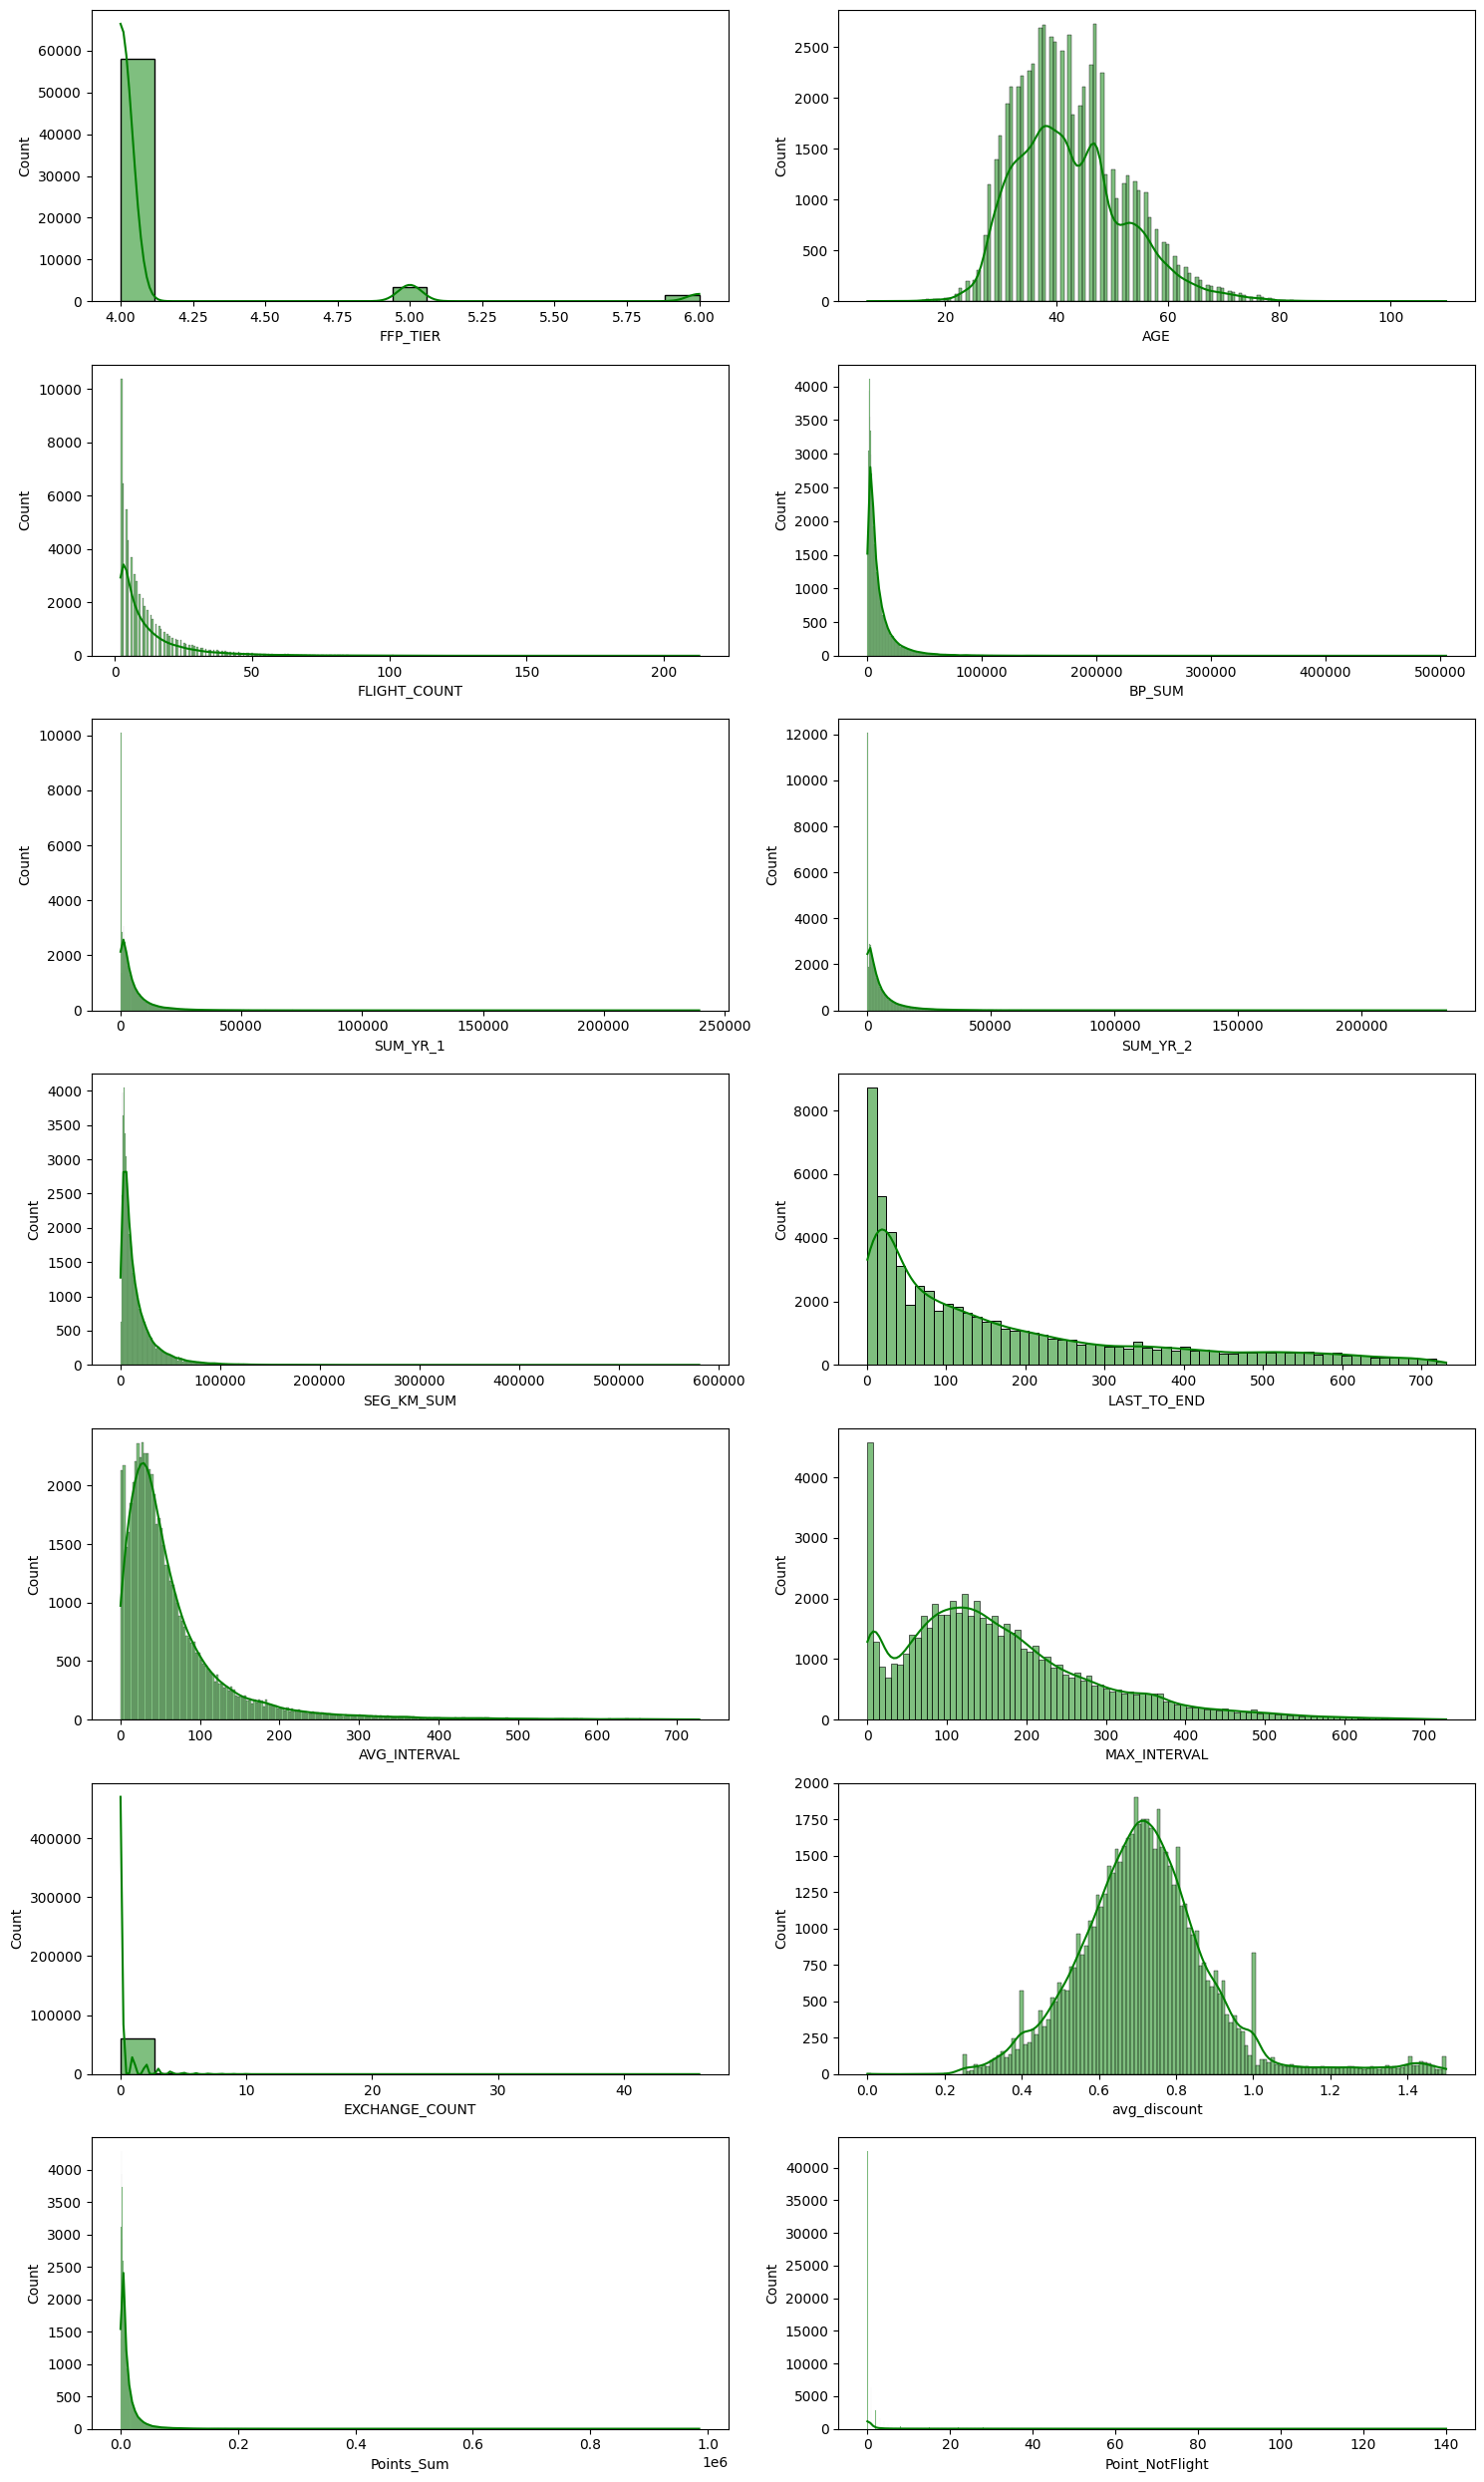

In [ ]:
nums = ['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']

plt.figure(figsize=(15, 25))
for i in range(0, len(nums)):
    plt.subplot(7, 2, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

### Countplot (categorical)

<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 65294 (\N{FULLWIDTH FULL STOP}) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 57385 (\ue029) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 65332 (\N{FULLWIDTH LATIN CAPITAL LETTER T}) missing from current font.
  plt.tight_layout()
<ipython-input-17-f865277c97f9>:17: UserWarning: Glyph 65335 (\N{

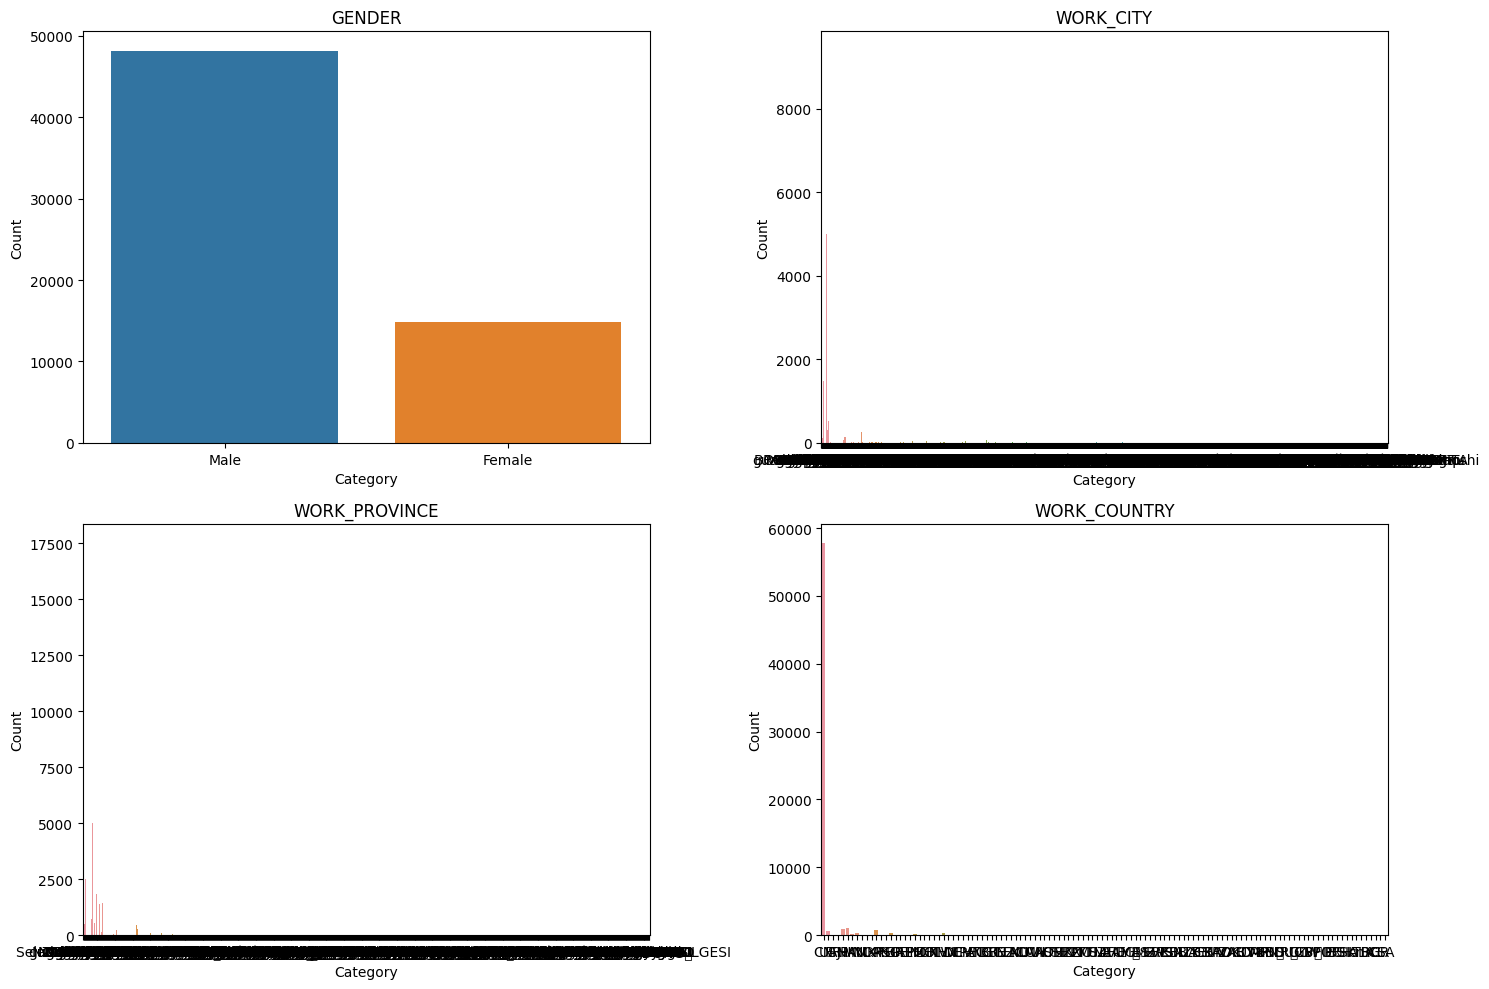

In [ ]:
feat_cat = cats
n = len(feat_cat)

rows = (n + 1) // 2
cols = 2

fig, ax = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i in range(n):
    row = i // 2
    col = i % 2
    sns.countplot(x=df[feat_cat[i]], ax=ax[row, col])
    ax[row, col].set_title(feat_cat[i])
    ax[row, col].set_xlabel("Category")
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

# **Multivariate Analysis**

### Correlation heatmap

<Axes: >

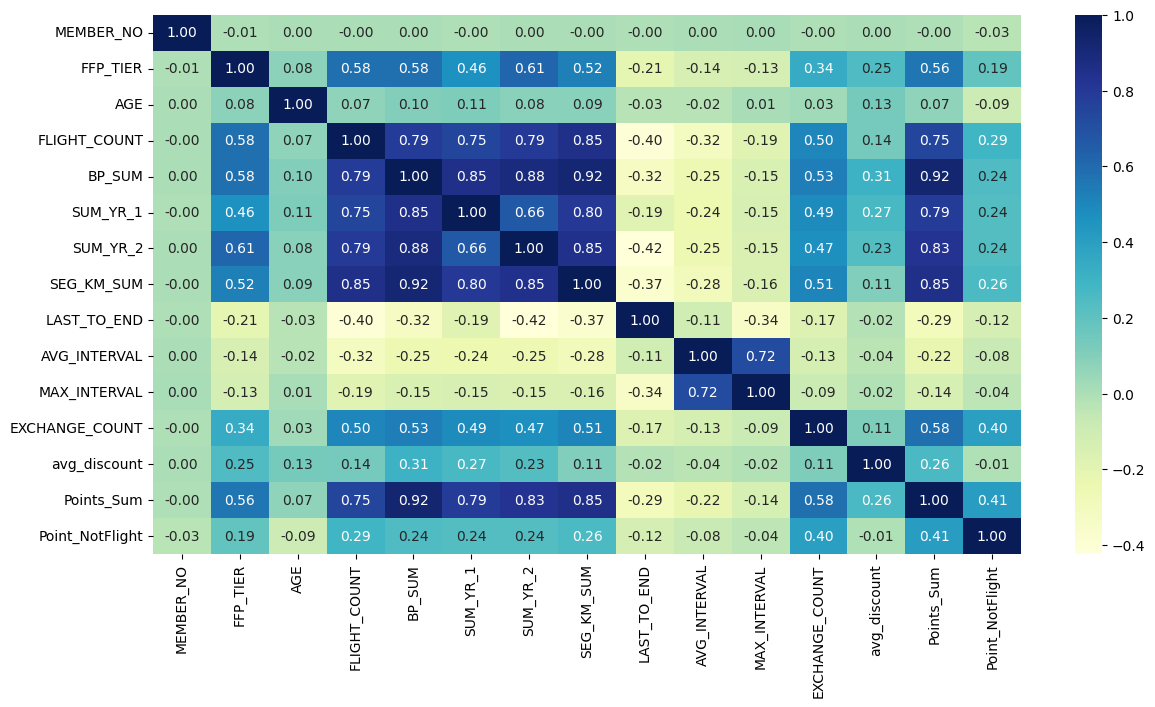

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

# **Data Preprocessing**

In [ ]:
df_2 = df.copy()

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
#Mengubah Tipe Data
df_2['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], format='%m/%d/%Y')
df_2['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], format='%m/%d/%Y')
df_2['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], format='%m/%d/%Y')
df_2['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], format='%m/%d/%Y', errors='coerce')

### Handling Missing Value

In [ ]:
df_2.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
#Menghandle Missing Value

df_2['GENDER'].fillna(df_2['GENDER'].mode()[0], inplace=True)
df_2['WORK_CITY'].fillna(df_2['WORK_CITY'].mode()[0], inplace=True)
df_2['WORK_PROVINCE'].fillna(df_2['WORK_PROVINCE'].mode()[0], inplace=True)
df_2['WORK_COUNTRY'].fillna(df_2['WORK_COUNTRY'].mode()[0], inplace=True)
df_2['AGE'].fillna(df_2['AGE'].median(), inplace=True)
df_2['SUM_YR_1'].fillna(df_2['SUM_YR_1'].median(), inplace=True)
df_2['SUM_YR_2'].fillna(df_2['SUM_YR_2'].median(), inplace=True)
df_2['LAST_FLIGHT_DATE'].fillna(pd.to_datetime('2014-03-01'), inplace=True)


df_2.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Handling Duplicated Data

In [ ]:
df_2.duplicated().sum()

0

In [ ]:
df_2.duplicated('MEMBER_NO').sum()

0

### Handling Invalid Values

In [ ]:
df_2.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

### Feature Extraction (Feature Engineering)
Tidak ada feature yang perlu di extraction, karena tidak ditemukan data yang aneh.

### Feature Selection (Feature Engineering)
- Dilakukan pemilihan feature yang sesuai untuk dilakukan cluster, feature tersebut adalah :
1. **GENDER** : Jenis Kelamin <br>
2. **FLIGHT_COUNT** : Jumlah Penerbangan <br>
3. **BP_SUM** : Rencana Perjalanan <br>
4. **SUM_YR_1** : Total Pendapatan <br>
5. **Avg_Discount** : Rata_rata Diskon yang didapatkan customer. <br>
- Dilakukan pemilihan 5 feature tersebut karena untuk mengelompokkan rencana perjalanan customer untuk setiap **GENDER**, maka selain dari feature tersebut dilakukan drop.

In [ ]:
# Drop feature
df_drop = df_2.drop(["MEMBER_NO","FFP_DATE",
           "FIRST_FLIGHT_DATE","FFP_TIER","WORK_CITY",
           "WORK_PROVINCE","WORK_COUNTRY",
           "AGE","LOAD_TIME","SUM_YR_2",
           "SEG_KM_SUM","LAST_FLIGHT_DATE",
           "LAST_TO_END","AVG_INTERVAL",
           "MAX_INTERVAL","EXCHANGE_COUNT",
           "Points_Sum","Point_NotFlight"],axis=1)
df_drop.sample(5)

,GENDER,FLIGHT_COUNT,BP_SUM,SUM_YR_1,avg_discount
3069,Male,36,34050,7033.0,0.740095
16440,Male,31,15023,12474.0,0.792868
10190,Male,26,16931,12957.0,0.770973
5440,Male,44,28418,12551.0,0.767500
57276,Male,2,1377,1584.0,0.800000


Merubah data GENDER, karena model Machine Learning hanya bisa memperoses data Numerik

In [ ]:
# Ubah data GENDER
df_drop['GENDER'] = df_drop['GENDER'].replace('Male', '0')
df_drop['GENDER'] = df_drop['GENDER'].replace('Female', '1')
df_drop.sample(5)

,GENDER,FLIGHT_COUNT,BP_SUM,SUM_YR_1,avg_discount
57848,0,2,1803,595.0,0.795908
24984,0,14,7518,2414.0,0.568329
18429,0,16,10290,4786.0,0.710355
9414,0,37,16293,7742.0,0.533012
36298,0,7,6158,1710.0,0.795072


In [ ]:
df_drop['GENDER'] = df_drop['GENDER'].astype(int)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GENDER        62988 non-null  int64  
 1   FLIGHT_COUNT  62988 non-null  int64  
 2   BP_SUM        62988 non-null  int64  
 3   SUM_YR_1      62988 non-null  float64
 4   avg_discount  62988 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.4 MB


### Handling Outliers (Numeric)

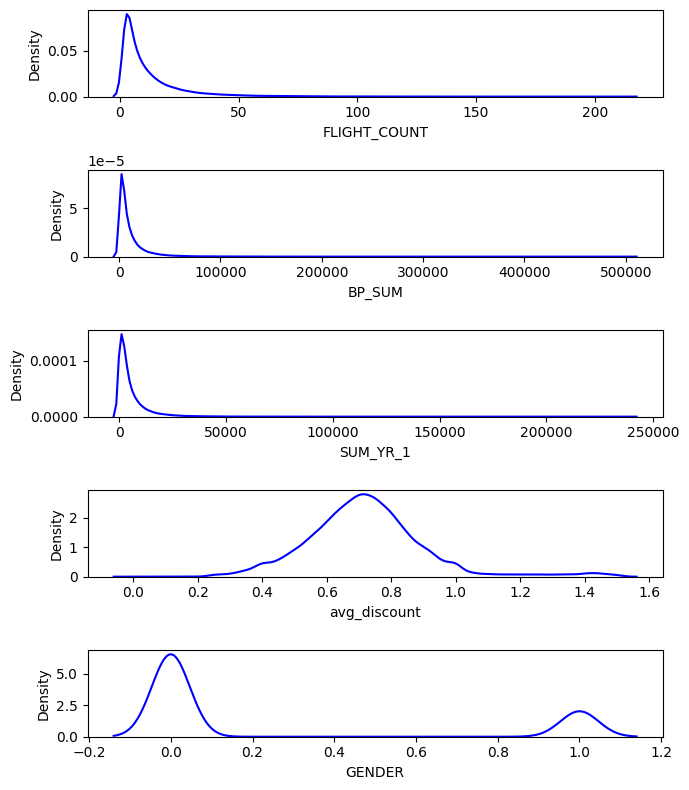

In [ ]:
#df_drop (distribusi before Z-Score)
nums = ["FLIGHT_COUNT","BP_SUM","SUM_YR_1","avg_discount","GENDER"]


fig = plt.figure(figsize=(7, 8))
for i in range(0, len(nums)):
    plt.subplot(5,1, i+1)
    sns.kdeplot(x = df_drop[nums[i]], color='blue')
    plt.xlabel(nums[i])

plt.tight_layout()

### ***z-score***

In [ ]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_drop)}')

filtered_entries = np.array([True] * len(df_drop))

for col in ["FLIGHT_COUNT","BP_SUM","SUM_YR_1","avg_discount","GENDER"]:
    zscore = abs(stats.zscore(df_drop[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_drop = df_drop[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_drop)}')

Jumlah baris sebelum memfilter outlier: 62988
Jumlah baris setelah memfilter outlier: 59713


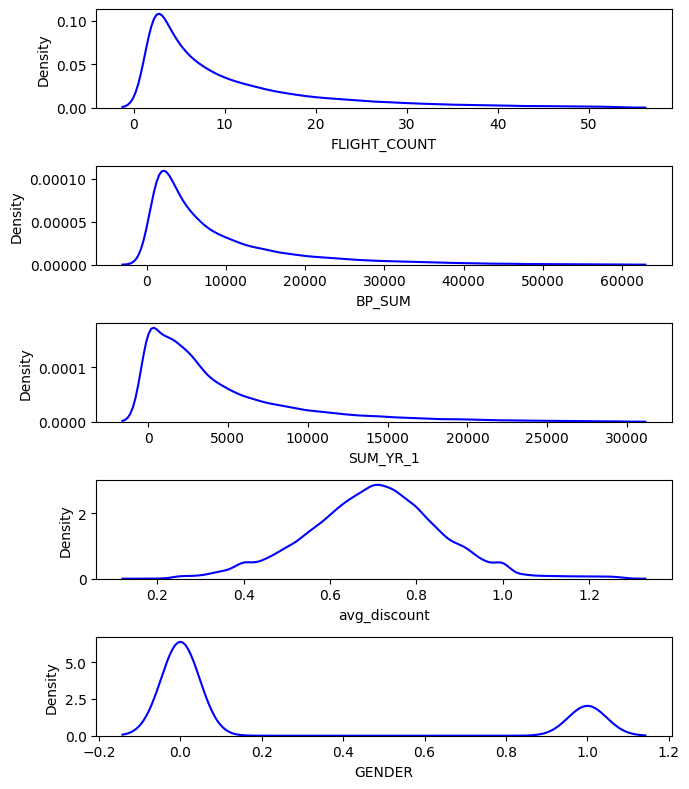

In [ ]:
# Setelah Z_Score
nums = ["FLIGHT_COUNT","BP_SUM","SUM_YR_1","avg_discount","GENDER"]

fig = plt.figure(figsize=(7, 8))
for i in range(0, len(nums)):
    plt.subplot(5,1, i+1)
    sns.kdeplot(x = df_drop[nums[i]], color='blue')
    plt.xlabel(nums[i])

plt.tight_layout()

### Feature Transformation (Numeric)

In [ ]:
from sklearn.preprocessing import StandardScaler
feats = ["FLIGHT_COUNT","BP_SUM","SUM_YR_1","avg_discount","GENDER"]
X = df_drop[feats].values
X_std = StandardScaler().fit_transform(X)
dfs = pd.DataFrame(data=X_std, columns=feats)
dfs.head()

,FLIGHT_COUNT,BP_SUM,SUM_YR_1,avg_discount,GENDER
0,0.296626,5.156884,2.204817,-0.335347,-0.563806
1,1.636956,4.979181,4.956778,-0.238484,-0.563806
2,0.915240,5.375897,-0.177733,0.098514,-0.563806
3,0.296626,4.868035,2.220330,-0.079628,1.773661
4,-0.115783,5.157321,1.467858,0.010923,-0.563806


# Elbow Method
Menentukan jumlah cluster yang optimal dalam algoritma clustering menggunakan K-Means

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: >

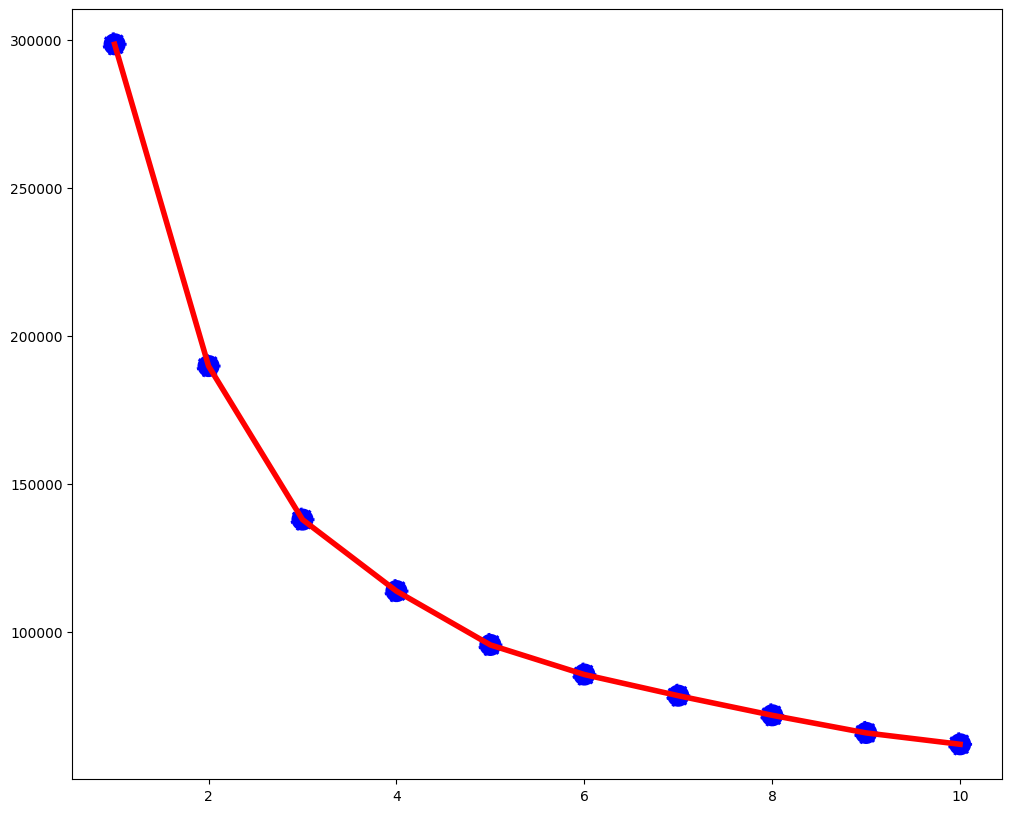

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# list nilai inersia
inertias = []

# k range yang akan diuji
k_range = range(1,11)

# hitung inersia untuk setiap nilai k
for k in k_range:
  model = KMeans(n_clusters = k, random_state = 0) 
  model.fit(dfs)
  inertias.append(model.inertia_)

plt.figure(figsize=(12, 10))

# plot grafik inersia terhadap jumlah cluster k
sns.lineplot(x=range(1, 11), y=inertias, color='red', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertias, s=300, color='blue',  linestyle='--')


# Clustering K-means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=30)
kmeans.fit(dfs)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [ ]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,FLIGHT_COUNT,BP_SUM,SUM_YR_1,avg_discount,GENDER,cluster
0,0.296626,5.156884,2.204817,-0.335347,-0.563806,2
1,1.636956,4.979181,4.956778,-0.238484,-0.563806,2
2,0.915240,5.375897,-0.177733,0.098514,-0.563806,2
3,0.296626,4.868035,2.220330,-0.079628,1.773661,2
4,-0.115783,5.157321,1.467858,0.010923,-0.563806,2


In [ ]:
## melakukan PCA untuk melihat visualisasi
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(dfs)
pcs = pca.transform(dfs)

In [ ]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = dfs['cluster']
data_pca.head()

,PC 1,PC 2,cluster
0,4.291080,-1.240351,2
1,6.452009,-1.584034,2
2,3.558145,-0.935124,2
3,3.986833,-0.810638,2
4,3.740378,-0.944912,2


<Axes: xlabel='PC 1', ylabel='PC 2'>

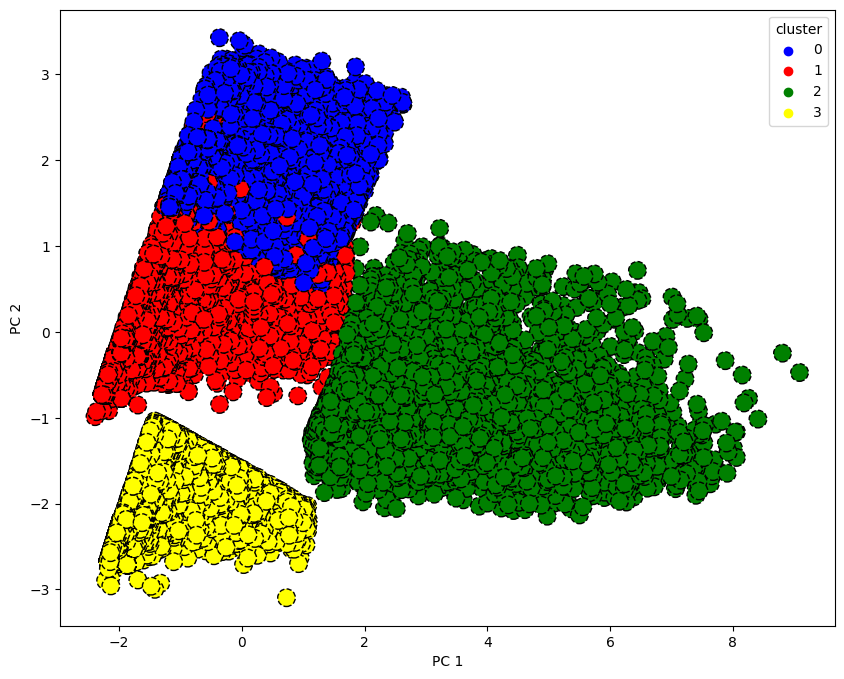

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)

# Interpretasi

In [ ]:
dfs['cluster'] = kmeans.labels_
dfs.head()

,FLIGHT_COUNT,BP_SUM,SUM_YR_1,avg_discount,GENDER,cluster
0,0.296626,5.156884,2.204817,-0.335347,-0.563806,2
1,1.636956,4.979181,4.956778,-0.238484,-0.563806,2
2,0.915240,5.375897,-0.177733,0.098514,-0.563806,2
3,0.296626,4.868035,2.220330,-0.079628,1.773661,2
4,-0.115783,5.157321,1.467858,0.010923,-0.563806,2


Dari hasil clustering menggunakan K-Means diperoleh statistik deskriptif mean dan median setiap fitur cluster adalah sebagai berikut:

In [ ]:
display(dfs.groupby('cluster').agg(['mean','sum','count']))

FLIGHT_COUNT                         BP_SUM                       \
                mean           sum  count      mean           sum  count   
cluster                                                                    
0          -0.204407  -4205.476304  20574 -0.121892  -2507.813569  20574   
1          -0.376552  -4908.728142  13036 -0.358275  -4670.474937  13036   
2           1.850948  16467.885842   8897  1.862057  16566.723739   8897   
3          -0.427391  -7353.681396  17206 -0.545649  -9388.435233  17206   

         SUM_YR_1                      avg_discount                       \
             mean           sum  count         mean           sum  count   
cluster                                                                    
0       -0.152625  -3140.111978  20574     0.690866  14213.876383  20574   
1       -0.324663  -4232.307910  13036    -0.205263  -2675.804943  13036   
2        1.767672  15726.975499   8897     0.325858   2899.154254   8897   
3       -0.485561  -8354.555610  17206    -0.839081 -14437.225693  17206   

           GENDER                       
             mean           sum  count  
cluster                                 
0       -0.559829 -11517.926801  20574  
1        1.773661  23121.441286  13036  
2       -0.213856  -1902.673900   8897  
3       -0.563806  -9700.840585  17206

### Deskripsi Customer

Berdasarkan persebaran statistik untuk masing-masing cluster dapat disimpulkan sebagai berikut :
- **FLIGHT_COUNT (Jumlah Penerbangan Customer)** terbanyak terdapat pada cluster 0 sebesar 20574, akan tetapi rata-rata dan jumlah penerbangan tertingginya terdapat pada cluster 2 sebesar 1.85 dan 16467.
- **BP_SUM (Rencana Perjalanan Customer)** kesuatu tempat yang sama terdapat pada cluster 0 sebesar 20574, akan tetapi rata-rata dan jumlah rencana perjalanan tertingginya terdapat pada cluster 2 sebesar 1.86 dan 16566.
- **SUM_YR_1 (Total Pendapatan)** terbanyak selama pemesanan tiket oleh customer terdapat pada cluster 0 sebesar 20574, akan tetapi rata-rata dan jumlah pendapatan tertingginya terdapat pada cluster 2 sebesar 1.76 dan	15726.
- **avg_discount (Rata-rata Diskon)** terbanyak terdapat pada cluster 0 sebesar 20574, akan tetapi rata-rata dan jumlah diskon yang diberikan tertingginya terdapat pada cluster 2 sebesar 0.32 dan	2899.
- **GENDER (Jenis Kelamin)**, berdasarkan pengelompokan berdasarkan masing-masing gender terbanyak terdapat pada cluster 0 sebesar 20574, akan tetapi rata-rata dan jumlah gender tertinggi berdasarkan masing-masing pengelompokan gender terdapat pada cluster 1 sebesar 1.7 dan 23121.
- Sehingga dapat disimpulkan, berdasarkan data pemesanan tiket customer yang lebih dominan memesan tiket terbanyak pada cluster 0, sedangkan berdasarkan rata-rata dan jumlah pemesanan tiket yang lebih dominan terdapat pada cluster 2.

### Rekomendasi Bisnis

- Lebih memperhatikan cluster 3, karena berdasarkan persebaran statistiknya cluster 3 memiliki nilai lebih rendah daripada cluster lainnya untuk setiap data pengelompokan, meskipun secara banyaknya pemesanan tiket tidak terlalu rendah.
- Rekomendasinya mungkin bisa lebih memberikan penawaran yang lebih kepada cluster 3 seperti penawaran promo jika customer bersedia membeli tiket dengan tujuan perjalanan yang lebih jauh, sehingga dapat meningkatkan revenue bagi company.